* Product Rating Prediction steps:-
    *   1- ✔️ Meme competition [optional]
    *   2- ✔️ Problem Formulation
    *   3- ✔️ Document your code
    *   4- ✔️ Model Tuning and Documentation
    *   5- ✔️ Answer some of questions (briefly)

1- ✔️ Meme competition [optional]:
* Include/find a MEME that you liked related to data science/data mining/machine learning. You can upload yours here
https://github.com/CISC-873/Information-2022/issues/1.

2- ✔️ Problem Formulation:
* Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

### Define the problem
* The problem is to predict the product ratings for a product on Wish.com. Ratings are in categories from 1 to 5. For one product, the higher the rating is, the more the customers like the product. In this way, when you have a new product to be put on wish.com, you can estimate how likely people will like your product, without actually listing out there. 

### What is the input ?
* Numerical and categorical columns about the product that contributes to the rating score.

### What is the output?
* The output will be Ratings of the product from 1 to 5.

### What data mining function is required? 
* Data Cleaning or Cleansing 
    * 1) Import the required Python libraries
    * 2) Read Data
    * 3) Some feature engineering
* Work with Missing Data
    * 1)Check Missing Data
        1. Transform missing values to Nan for unknown values.
        2. Check NaN Values Count.
    * 2) Drop Missing Data
    * 3) Fill Missing data with Pandas
        - For Numerical Data
            * Mean
            * Median
            * Mode or Most frequent
        - For Categorical Data
            * Mode or Most frequent
    * 4) Fill Missing data with Sklearn Imputer
        - SimpleImputer
            * Mean
            * Median
            * Mode or Most frequent
        - KNNImputer
* Outliers Handling
* Data Split to Train and Test Sets
* Data Preprocessing Project – Feature Scaling
* Models that will be used
    * 1) Tried decision tree model with at least 2 different configurations/hyper-parameters
    * 2) Tried SVM model with at least 2 different configurations/hyper-parameters
    * 3) Tried Naive Bayesian model.

### What could be the challenges?
* The implementation of preprocessing processes, selection of appropriate features to increase model performance and the accuracy of machine learning or data mining models are affected because of poor quality of data, are considered to be challenging.
* The real dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

### What is the impact?
* 1) Product ratings can help your products rank higher in search engine results pages (SERPs) and benefit your SEO rankings. 
* 2) Product Ratings are an effective way to learn about a product's quality and features.
* 3) Product Ratings can help influence the buying decisions of potential customers.
* 5) Product Ratings can help businesses develop more effective marketing plans.
* 6) Product Ratings can help build trust with potential customers.
* 7) Product Ratings word-of-mouth marketing for your brand and products or services.
* 8) Product Ratings can be helpful for learning about problems with a given product.
* 9) It will be able to predict the evaluation of other products that have not been evaluated by people,
* 10) Knowing about potential problems ahead of time can help you avoid them in the future.  

### What is an ideal solution?
* The ideal solution of this problem will be a model that deals with high range of products with difference quality ratings.

# Data Cleaning or Cleansing

Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data.

So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

In this project, I present several useful ways to handle these discrepancies in the dataset.

# First Code 

## * 1- Import the required Python libraries

In [1]:
# The libraries 
import pandas as pd # Used for data analysis and associated manipulation of tabular data in DataFrames
import numpy as np # Used to perform a wide variety of mathematical operations on arrays.

# Used to visualize distribution, trends and relationships of variables(visualization)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Used for Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Normalizero split the data and Grid Search for hyperparameter
from sklearn.model_selection import train_test_split,  GridSearchCV

# Import needed models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Importing metric  
from sklearn.metrics import f1_score

## 2-Load the dataset

In [2]:
# We have two datasets to import one for trainig and another for testing in csv formats 
Tr_df = pd.read_csv("D:\\DEBI Master\\Data Mining\\Competition (1)\\train_new.csv")
Ts_df = pd.read_csv("D:\\DEBI Master\\Data Mining\\Competition (1)\\test_new.csv")

In [3]:
# We will deal first with training data 
Tr_df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [4]:
# Some informations of df
Tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

In [5]:
# To describe some statistical info about num coumns 
Tr_df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


### Data Cleaning or Cleansing

In [6]:
# Check Missing values
Tr_df.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

In [7]:
# We found that there are 3 features with huge number nulls, so we can drop them 
Tr_df.drop([ 'urgency_text','has_urgency_banner','merchant_profile_picture'], axis=1,inplace=True)

In [8]:
# To make sure that the columns are have been dropped
Tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

# Univariate Analysis
* >Numerical 
    * (price, retail_price, units_sold, uses_ad_boosts, rating, rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,inventory_total,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id)
* >Categorical 
    * (currency_buyer, tags, product_color, product_variation_size_id, shipping_option_name, origin_country, merchant_title, merchant_name, merchant_info_subtitle , merchant_id ,theme,crawl_month)

### For categorical Columns 

# currency_buyer column

In [9]:
#check the unique values for column
Tr_df['currency_buyer'].unique()

array(['EUR'], dtype=object)

In [10]:
#As we see the currency_buyer columns has only one unique value so we can drop it 
Tr_df.drop(['currency_buyer'],axis=1,inplace=True)

#  product_color column

In [11]:
# #check the unique values for column
Tr_df['product_color'].unique() , Tr_df['product_color'].value_counts()

(array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
        'winered', 'blue', 'red', 'navyblue', 'green', 'khaki', 'White',
        'white & green', 'multicolor', 'lightpink', 'pink', 'RED',
        'armygreen', 'lightblue', nan, 'coffee', 'grey', 'skyblue',
        'watermelonred', 'pink & black', 'whitefloral', 'purple', 'navy',
        'pink & white', 'rosered', 'orange', 'Black', 'mintgreen',
        'leopardprint', 'gray', 'navy blue', 'star', 'rose', 'lightyellow',
        'camouflage', 'black & yellow', 'whitestripe', 'navyblue & white',
        'black & blue', 'lightred', 'violet', 'gold', 'black & green',
        'white & black', 'burgundy', 'black & white', 'lightgrey',
        'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
        'silver', 'wine red', 'Army green', 'pink & blue', 'rainbow',
        'claret', 'floral', 'brown & yellow', 'light green', 'Pink',
        'blue & pink', 'dustypink', 'camel', 'orange-red', 'rosegold',
        'ivory'

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


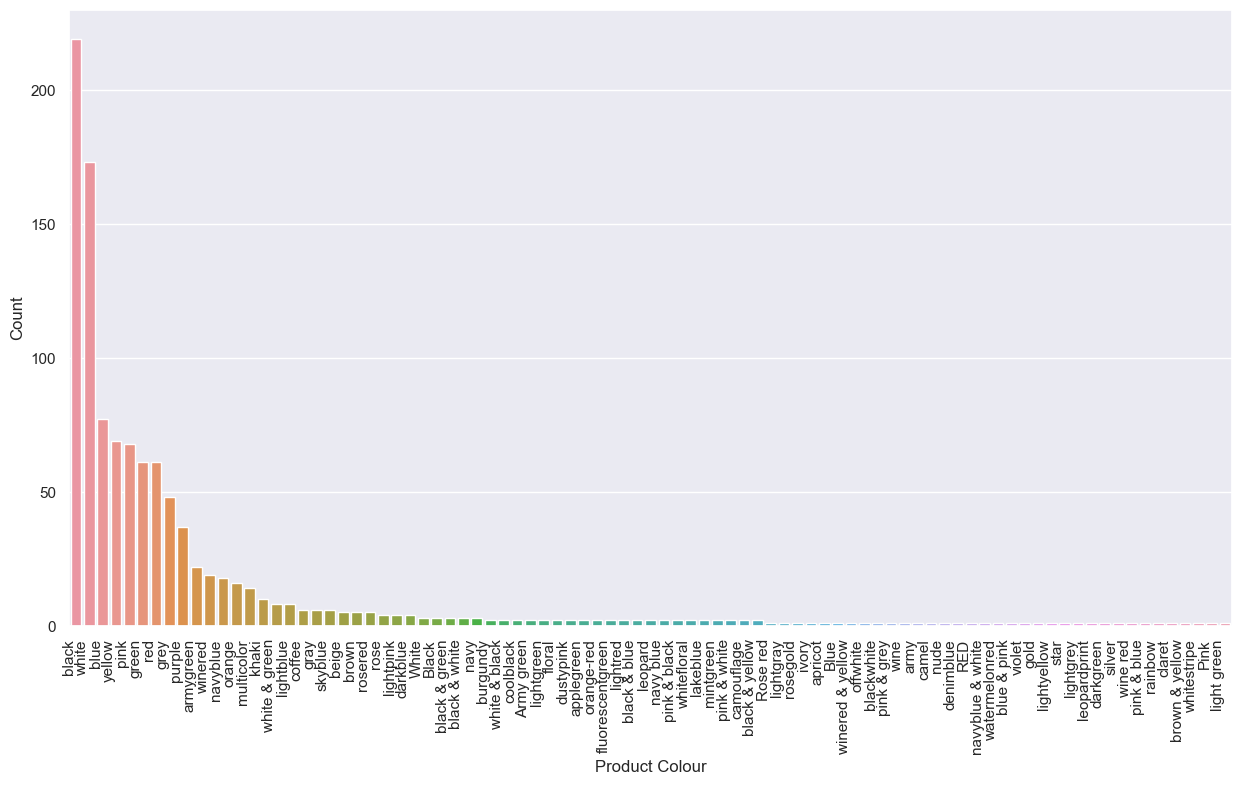

In [12]:
# A histogram is used to summarize and represente the data for this column
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot('product_color', data = Tr_df, order = Tr_df['product_color'].value_counts().index, ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [13]:
# convert to lower case and remove the white space
Tr_df['product_color'] = Tr_df['product_color'].str.lower() # try to make matching like Black = black
Tr_df['product_color'] = Tr_df['product_color'].str.strip() # try to make matching likw armygreen = Army green 
Tr_df['product_color'].unique()

array(['yellow', 'black', 'white', 'lakeblue', 'apricot', 'brown',
       'winered', 'blue', 'red', 'navyblue', 'green', 'khaki',
       'white & green', 'multicolor', 'lightpink', 'pink', 'armygreen',
       'lightblue', nan, 'coffee', 'grey', 'skyblue', 'watermelonred',
       'pink & black', 'whitefloral', 'purple', 'navy', 'pink & white',
       'rosered', 'orange', 'mintgreen', 'leopardprint', 'gray',
       'navy blue', 'star', 'rose', 'lightyellow', 'camouflage',
       'black & yellow', 'whitestripe', 'navyblue & white',
       'black & blue', 'lightred', 'violet', 'gold', 'black & green',
       'white & black', 'burgundy', 'black & white', 'lightgrey',
       'coolblack', 'lightgreen', 'beige', 'darkblue', 'darkgreen',
       'silver', 'wine red', 'army green', 'pink & blue', 'rainbow',
       'claret', 'floral', 'brown & yellow', 'light green', 'blue & pink',
       'dustypink', 'camel', 'orange-red', 'rosegold', 'ivory',
       'fluorescentgreen', 'winered & yellow', 'offwh

In [14]:
Tr_df['product_color'].value_counts()

black             222
white             176
blue               78
pink               69
yellow             69
                 ... 
lightgrey           1
lightyellow         1
whitestripe         1
gold                1
brown & yellow      1
Name: product_color, Length: 82, dtype: int64

In [15]:
"""From visulaization we find that there are lots of colors may be noisy in columns and also there is human error 
with entring data like (lightgrey and lightgray) also ('blackwhite' and  'black & white') and there are values with 
only one time repetition. So we will handle this by using replace method , to make the color that has the soft shade of 
another color as one category 
"""  
Tr_df['product_color'] = Tr_df['product_color'].replace('beige', 'ivory')
Tr_df['product_color'] = Tr_df['product_color'].replace('coolblack', 'black')
Tr_df['product_color'] = Tr_df['product_color'].replace('orange-red', 'orange')
Tr_df['product_color'] = Tr_df['product_color'].replace('lightyellow', 'yellow')
Tr_df['product_color'] = Tr_df['product_color'].replace('multicolor', 'rainbow')
Tr_df['product_color'] = Tr_df['product_color'].replace('leopardprint', 'leopard')
Tr_df['product_color'] = Tr_df['product_color'].replace('blue & pink', 'pink & blue')
Tr_df['product_color'] = Tr_df['product_color'].replace(['gray', 'lightgrey', 'lightgray'], 'grey')
Tr_df['product_color'] = Tr_df['product_color'].replace(['nude', 'khaki', 'coffee', 'camel', 'apricot'], 'brown')
Tr_df['product_color'] = Tr_df['product_color'].replace(['skyblue', 'lakeblue', 'navyblue', 'darkblue', 'lightblue', 'navy blue', 'denimblue'], 'blue')
Tr_df['product_color'] = Tr_df['product_color'].replace(['whitefloral', 'offwhite', 'whitestripe'], 'white')
Tr_df['product_color'] = Tr_df['product_color'].replace(['lightpink', 'dustypink', 'whitestripe'], 'pink')
Tr_df['product_color'] = Tr_df['product_color'].replace(['blackwhite', 'black & white'], 'white & black')
Tr_df['product_color'] = Tr_df['product_color'].replace(['winered','rosered' ,'rose','lightred','wine red', 'burgundy','rose red', 'watermelonred'], 'red')
Tr_df['product_color'] = Tr_df['product_color'].replace(['mintgreen', 'darkgreen', 'lightgreen','armygreen', 'applegreen','army green', 'camouflage', 'army', 'light green', 'fluorescentgreen'], 'green')
Tr_df['product_color'] = Tr_df['product_color'].replace([np.nan, 'pink & grey', 'navyblue & white', 'brown & yellow', 'black & yellow', 'leopard', 'star','nude', 'khaki', 'coffee', 'camel', 'apricot', 'orange-red','blackwhite',
                                                   'pink & black', 'navy', 'pink & white', 'navyblue & white', 'black & blue', 'violet', 'gold', 'multicolor','blue & pink','beige','leopardprint','black & white',
                                                   'black & green', 'silver', 'pink & blue', 'claret', 'floral', 'rosegold', 'winered & yellow', 'wine','white & black','ivory','white & green','rainbow','orange','brown'], 'other')

Tr_df['product_color'].unique()


array(['yellow', 'black', 'white', 'blue', 'other', 'red', 'green',
       'pink', 'grey', 'purple'], dtype=object)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


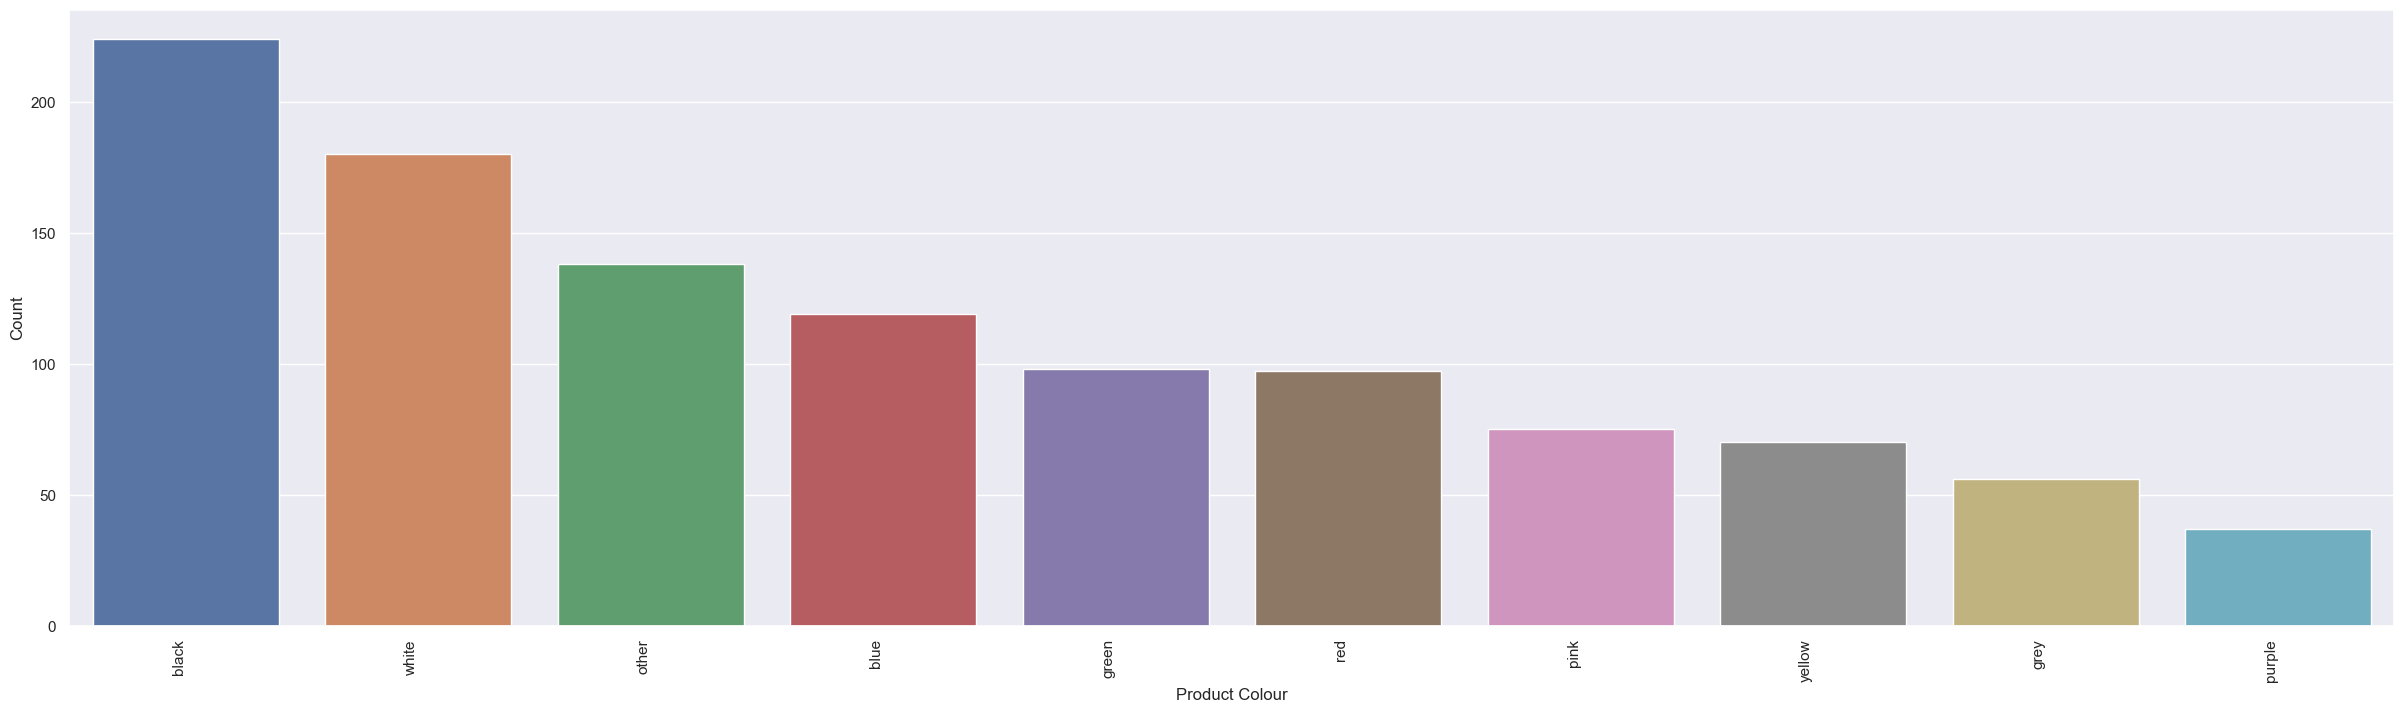

In [16]:
# In this histogram, the data has a better vary in the data 
fig, ax = plt.subplots(figsize=(30, 8))
sns.countplot('product_color', data = Tr_df, order = Tr_df['product_color'].value_counts().index, ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# For the theme column 

In [17]:
Tr_df['theme'].unique()

array(['summer'], dtype=object)

In [18]:
# It has only one unique value so we will drop it 
Tr_df.drop(['theme'],axis=1 , inplace=True)

# For The origin_country

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


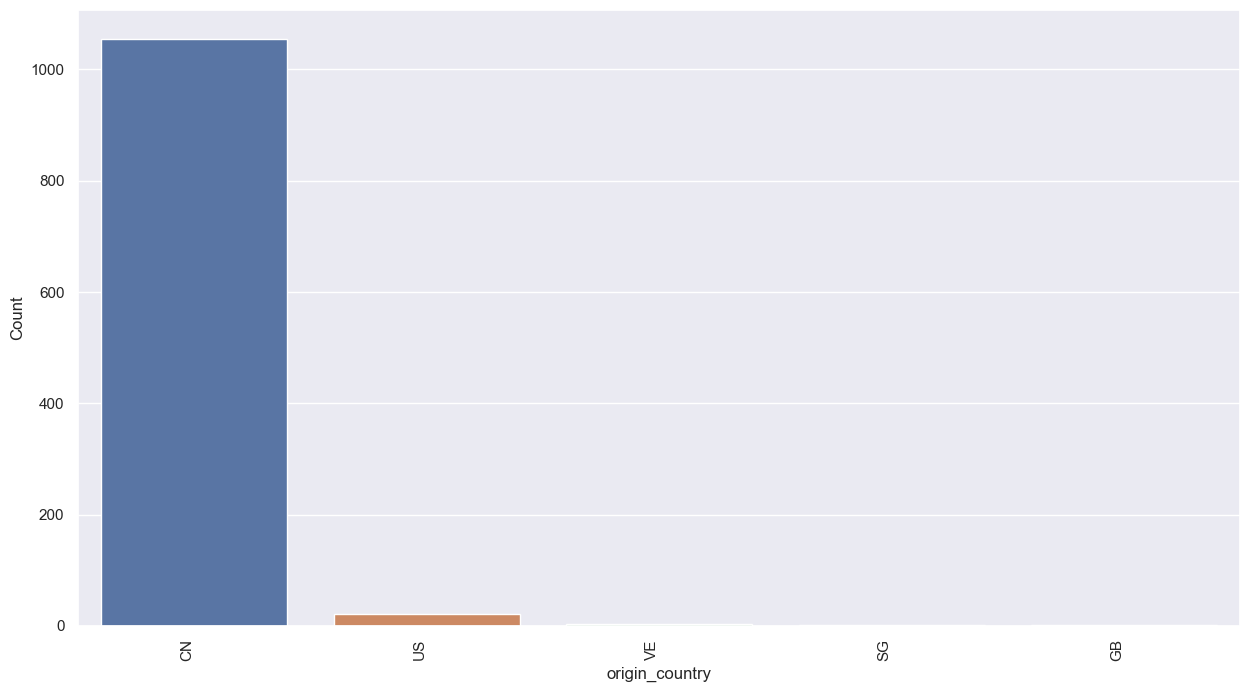

In [19]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot('origin_country', data = Tr_df, order = Tr_df['origin_country'].value_counts().index, ax = ax)
ax.set(xlabel='origin_country', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

In [20]:
# All values except the value of 'CN' will be other 
Tr_df['origin_country'] = Tr_df['origin_country'].replace([np.nan,'US','GB','SG','AT','VE',], 'Other')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


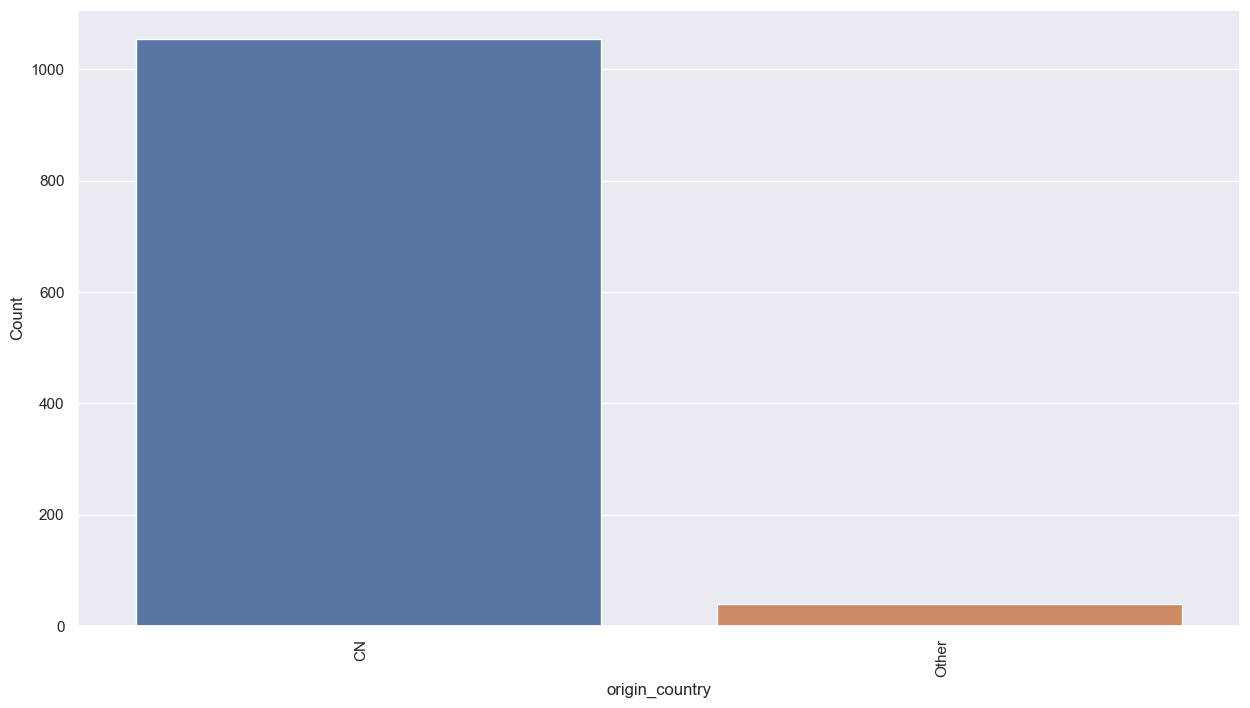

In [21]:
# checking for distribution of 'origin_country' to see if it correctly categorized everything
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot('origin_country', data = Tr_df, order = Tr_df['origin_country'].value_counts().index, ax = ax)
ax.set(xlabel='origin_country', ylabel='Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# For shipping_option_name column

In [22]:
Tr_df['shipping_option_name'].unique(), Tr_df['shipping_option_name'].value_counts()

(array(['Livraison standard', 'Standard Shipping', 'الشحن القياسي',
        'Expediere Standard', 'Envío normal', 'Standardowa wysyłka',
        'Envio Padrão', 'Standardversand', 'Spedizione standard',
        'Standart Gönderi', 'Livraison Express', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
        'Стандартная доставка'], dtype=object),
 Livraison standard         1047
 Standard Shipping            16
 Envio Padrão                  6
 الشحن القياسي                 4
 Expediere Standard            4
 Envío normal                  3
 Standardversand               3
 Livraison Express             3
 Standardowa wysyłka           2
 Standart Gönderi              2
 Стандартная доставка          2
 Spedizione standard           1
 ការដឹកជញ្ជូនតាមស្តង់ដារ       1
 Name: shipping_option_name, dtype: int64)

In [23]:
""" I make the drop of anything the last choice so after understanding the columns i found that: 
The meaning of 'Standard Shipping' in ARABIC is (الشحن القياسي') and in KHMER is ('ការដឹកជញ្ជូនតាមស្តង់ដារ') 
and in RUSSIAN is (Стандартная доставка) and in turkish (Standard Gönderi) and in polish is (Standardowa wysyłka)
and in Envio Padrão is (Envio Padrão) and in SPANISH is (Envío normal) and in ITALIAN is (Spedizione standard)..etc
It Has the same the same meaning but with different languages so i deal with it as only one unique value so i will 
drop it.
"""

# Tr_df.drop(['shipping_option_name'],axis=1,inplace=True) 

" I make the drop of anything the last choice so after understanding the columns i found that: \nThe meaning of 'Standard Shipping' in ARABIC is (الشحن القياسي') and in KHMER is ('ការដឹកជញ្ជូនតាមស្តង់ដារ') \nand in RUSSIAN is (Стандартная доставка) and in turkish (Standard Gönderi) and in polish is (Standardowa wysyłka)\nand in Envio Padrão is (Envio Padrão) and in SPANISH is (Envío normal) and in ITALIAN is (Spedizione standard)..etc\nIt Has the same the same meaning but with different languages so i deal with it as only one unique value so i will \ndrop it.\n"

# For product_variation_size_id column

In [24]:
Tr_df['product_variation_size_id'].unique(), Tr_df['product_variation_size_id'].value_counts()

(array(['M', 'L', 'XS', 'S', 'XL', '26(Waist 72cm 28inch)', 'S.',
        'S(bust 88cm)', 'XXS', 's', '29', nan, 'choose a size', 'XXXS',
        'Base Coat', 'Size M', 'XXL', 'M.', 'XS.',
        '100 x 100cm(39.3 x 39.3inch)', '2pcs', '4XL', '1', '25-S',
        'Size-XXS', '5PAIRS', '35', 'Pack of 1', 'Size S', 'Size-S', '6XL',
        '25', 'S/M(child)', '60', 'Size-XS', 'S (waist58-62cm)',
        'SIZE XXS', '10 ml', 'X   L', 'Women Size 36', '04-3XL',
        'Size -XXS', '1 pc.', 'Floating Chair for Kid', 'S Pink', '34',
        'US-S', 'Size XXS', 'pants-S', 'XXXXL', 'SIZE-XXS', 'SIZE XS',
        '1pc', 'Size S.', '100 cm', 'S..', 'Round', '4-5 Years', '5', '33',
        '30 cm', '2', 'XXXXXL', '20PCS-10PAIRS', '2XL', 'Size-5XL',
        'Size4XL', 'One Size', 'size S', 'Size/S', 'B', 'SizeL', '20pcs',
        '1 PC - XL', 'Suit-S', 'Base & Top & Matte Top Coat',
        'Baby Float Boat', '1m by 3m', 'SIZE S', 'White', '40 cm', '5XL',
        '10pcs', 'H01'], dtype=object),


In [25]:
# As we see above it has lots of noise so we need to apply replace method to make the standard sizes
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace(['S.','Size S','Size-S', 'Size S.','S..','Size/S','SIZE S', 's', 'size S'], 'S')
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace(['Size-XXS','SIZE XXS','Size -XXS','SIZE-XXS', 'Size XXS'], 'XXS')
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace(['XS.','Size-XS','SIZE XS'], 'XS')
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace(['S/M(child)','M.','Size M'], 'M')
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace('SizeL', 'L')
Tr_df['product_variation_size_id'] = Tr_df['product_variation_size_id'].replace(['5PAIRS', '5', '26(Waist 72cm 28inch)', '29', np.nan , '1 pc.','1pc','One Size', '1', '2pcs ', '2', '6XL', 'XXXXXXL','Size-5XL','5XL', 'XXXXXL',
                                                                           '20PCS-10PAIRS','20pcs', '20','X   L','1 PC - XL', 'XL', '10pcs ', '10', 'choose a size', 'Base Coat', '100 x 100cm(39.3 x 39.3inch)','2XL ', 'XXL','Size-XXS',
                                                                           '2pcs','2XL ','2XL', 'S(bust 88cm)','XXXS' ,'25-S', 'S (waist58-62cm)', 'S Pink','US-S','pants-S','Suit-S', '35', 'Pack of 1','04-3XL','4XL','Size4XL', 'XXXXL',
                                                                           '25', '60', '10 ml', 'Women Size 36', 'Floating Chair for Kid', '34', '100 cm', 'Round', '4-5 Years', '33',
                                                                           '30 cm', 'B', 'Base & Top & Matte Top Coat', 'Baby Float Boat', '1m by 3m', 'White', '40 cm', '10pcs', 'H01'], 'Other')

Tr_df['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'Other', 'XXS'], dtype=object)

In [26]:
# we need to  identify duplicates
print(Tr_df.duplicated().sum())

0


# Fot the 'units_sold' column

In [27]:
Tr_df['units_sold'].unique(), Tr_df['units_sold'].value_counts()

(array([ 10000,   1000,    100,   5000,     50,  20000,     10,      8,
         50000,      2,      7,      1, 100000], dtype=int64),
 100       353
 1000      280
 5000      139
 10000     125
 20000      79
 50         54
 10         37
 50000      12
 100000      5
 8           4
 1           3
 2           2
 7           1
 Name: units_sold, dtype: int64)

In [28]:
# We notice that there are not many values less than 10 and also not many values bigger than 20k, So we will group them
def larger_20k_smaller_10(N):
    if  N< 10:
        return 10
    elif N > 20000:
        return 20000
    else:
        return N

Tr_df['units_sold'] = Tr_df['units_sold'].apply(larger_20k_smaller_10)

In [29]:
Tr_df['units_sold'].unique(), Tr_df['units_sold'].value_counts()

(array([10000,  1000,   100,  5000,    50, 20000,    10], dtype=int64),
 100      353
 1000     280
 5000     139
 10000    125
 20000     96
 50        54
 10        47
 Name: units_sold, dtype: int64)

# For Rating Column

In [30]:
# As mentioned in description the ratings are from 1 to 5 
Tr_df['rating'].unique()

array([4., 3., 5., 2., 1., 6.])

In [31]:
# We need to make the rating 6 to be 5 
def rating_max_5(num):
    if num == 6:
        return 5
    else:
        return num

In [32]:
Tr_df['rating'] = Tr_df['rating'].apply(rating_max_5) #We will apply the function to the rating column 
# to get the unique values after the change
print(Tr_df.rating.unique())

[4. 3. 5. 2. 1.]


In [33]:
# we will use drop fun. and fill the null values with zero
Tr_df = Tr_df.drop(columns=['tags', 'crawl_month','merchant_id', 'id'])
Tr_df = Tr_df.fillna(0)
print(Tr_df.isnull().sum())

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64


In [34]:
Tr_df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,37,50,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,41,50,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,25,50,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,15,50,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,0


# Work with categorical Data

Machine Learning algorithms require that input data must be in numerical format. Only then the algorithms work successfully on them. So, the text data must be converted into numbers before they are fed into an algorithm.

as we said before Categorical data can be **Ordinal** or **Nominal**


### Ordinal variable
can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can define an order XL > L > M.


### Nominal variable
nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In [35]:
# categorical columns in the dataframe
cat_cols = [col for col in Tr_df.columns if Tr_df[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder # import LabelEncoder class

Label_enc = LabelEncoder() # make an Object of this class
 
for Col in cat_cols: # loop on the cat_col to covert into numerical 
    Tr_df[Col] = Label_enc.fit_transform(Tr_df[Col].astype(str))

In [36]:
Tr_df

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,0,30,50,0,472,272,617,66644,4.137582,1
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,0,37,50,0,584,723,734,25752,4.256873,0
2,6.00,34,100,0,4.0,10,0,0,0,0,...,0,41,50,0,725,697,332,3897,3.928920,0
3,4.67,4,100,1,3.0,82,0,0,0,0,...,0,25,50,0,556,424,555,7497,4.079365,0
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,0,15,50,0,597,488,726,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,...,0,41,50,0,399,134,767,230951,4.311066,0
1090,5.00,5,1000,0,5.0,377,1,0,1,0,...,0,35,50,0,746,721,61,2904,4.422521,0
1091,9.00,48,1000,1,4.0,135,0,0,0,0,...,0,25,50,0,187,404,213,6632,3.748794,0
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,...,0,45,50,0,708,675,339,5816,3.936382,0


# We make the same Preprocessing for Test Data

In [37]:
Ts_df = pd.read_csv("D:\\DEBI Master\\Data Mining\\Competition (1)\\test_new.csv")

In [38]:
Ts_df.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


In [39]:
Ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

In [40]:
# First we will need to drop the id column becuse we will need it with the predicted values 
Ts_ID = pd.DataFrame({'id': Ts_df['id']}) 
Ts_ID

,id
0,937
1,270
2,308
3,913
4,403
...,...
474,1166
475,1416
476,63
477,626


In [41]:
# In the training set we dropped these columns, so we will drop them in the test set 
# we also do that on the test data
Ts_df = Ts_df.drop(columns=['tags', 'theme', 'crawl_month', 'currency_buyer','urgency_text','has_urgency_banner','merchant_id', 'merchant_profile_picture', 'id'])
Ts_df = Ts_df.fillna(0)
print('\n ', Ts_df.isnull().sum())


  price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_color                   0
product_variation_size_id       0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
dtype: int64


In [42]:
#check the unique values for column
Ts_df['product_color'].unique() 

array(['white', 'black', 'blue', 'yellow', 'winered', 'navyblue', 'gray',
       'grey', 0, 'green', 'pink', 'armygreen', 'red', 'black & green',
       'lightblue', 'pink & blue', 'orange', 'rosered', 'purple',
       'watermelonred', 'coralred', 'apricot', 'multicolor', 'tan',
       'orange & camouflage', 'white & green', 'army green', 'brown',
       'silver', 'offblack', 'rose', 'jasper', 'beige', 'Pink', 'floral',
       'lightyellow', 'white & red', 'red & blue', 'khaki', 'camel',
       'leopard', 'camouflage', 'greysnakeskinprint', 'fluorescentgreen',
       'coffee', 'lightpurple', 'black & stripe', 'lightgreen',
       'darkblue', 'navy', 'wine', 'lightkhaki', 'pink & grey',
       'prussianblue', 'skyblue', 'gray & white', 'orange-red'],
      dtype=object)

In [43]:
# convert to lower case and remove the white space
Ts_df['product_color'] = Ts_df['product_color'].str.lower() # try to make matching like Black = black
Ts_df['product_color'] = Ts_df['product_color'].str.strip() # try to make matching likw armygreen = Army green 
Ts_df['product_color'].unique()

array(['white', 'black', 'blue', 'yellow', 'winered', 'navyblue', 'gray',
       'grey', nan, 'green', 'pink', 'armygreen', 'red', 'black & green',
       'lightblue', 'pink & blue', 'orange', 'rosered', 'purple',
       'watermelonred', 'coralred', 'apricot', 'multicolor', 'tan',
       'orange & camouflage', 'white & green', 'army green', 'brown',
       'silver', 'offblack', 'rose', 'jasper', 'beige', 'floral',
       'lightyellow', 'white & red', 'red & blue', 'khaki', 'camel',
       'leopard', 'camouflage', 'greysnakeskinprint', 'fluorescentgreen',
       'coffee', 'lightpurple', 'black & stripe', 'lightgreen',
       'darkblue', 'navy', 'wine', 'lightkhaki', 'pink & grey',
       'prussianblue', 'skyblue', 'gray & white', 'orange-red'],
      dtype=object)

In [44]:
Ts_df['product_color'].value_counts()

black                  83
white                  81
yellow                 36
red                    32
pink                   32
green                  29
grey                   23
blue                   22
purple                 16
orange                 11
navyblue               10
armygreen               9
winered                 9
beige                   9
multicolor              6
gray                    5
lightblue               4
rosered                 3
floral                  3
darkblue                2
khaki                   2
fluorescentgreen        2
white & green           2
brown                   2
coralred                2
skyblue                 2
leopard                 2
navy                    1
wine                    1
lightkhaki              1
pink & grey             1
lightgreen              1
black & stripe          1
camouflage              1
prussianblue            1
lightpurple             1
coffee                  1
gray & white            1
greysnakeski

In [45]:
"""From visulaization we find that there are lots of colors may be noisy in columns and also there is human error 
with entring data like (lightgrey and lightgray) also ('blackwhite' and  'black & white') and there are values with 
only one time repetition. So we will handle this by using replace method , to make the color that has the soft shade of 
another color as one category 
"""  
Ts_df['product_color'] = Ts_df['product_color'].replace('beige', 'ivory')
Ts_df['product_color'] = Ts_df['product_color'].replace('coolblack', 'black')
Ts_df['product_color'] = Ts_df['product_color'].replace('orange-red', 'orange')
Ts_df['product_color'] = Ts_df['product_color'].replace('lightyellow', 'yellow')
Ts_df['product_color'] = Ts_df['product_color'].replace('multicolor', 'rainbow')
Ts_df['product_color'] = Ts_df['product_color'].replace('leopardprint', 'leopard')
Ts_df['product_color'] = Ts_df['product_color'].replace('blue & pink', 'pink & blue')
Ts_df['product_color'] = Ts_df['product_color'].replace(['gray', 'lightgrey', 'lightgray'], 'grey')
Ts_df['product_color'] = Ts_df['product_color'].replace(['nude', 'khaki', 'coffee', 'camel', 'apricot'], 'brown')
Ts_df['product_color'] = Ts_df['product_color'].replace(['skyblue', 'lakeblue', 'navyblue', 'darkblue', 'lightblue', 'navy blue', 'denimblue'], 'blue')
Ts_df['product_color'] = Ts_df['product_color'].replace(['whitefloral', 'offwhite', 'whitestripe'], 'white')
Ts_df['product_color'] = Ts_df['product_color'].replace(['lightpink', 'dustypink', 'whitestripe'], 'pink')
Ts_df['product_color'] = Ts_df['product_color'].replace(['blackwhite', 'black & white'], 'white & black')
Ts_df['product_color'] = Ts_df['product_color'].replace(['winered','rosered' ,'rose','lightred','wine red', 'burgundy','rose red', 'watermelonred'], 'red')
Ts_df['product_color'] = Ts_df['product_color'].replace(['mintgreen', 'darkgreen', 'lightgreen','armygreen', 'applegreen','army green', 'camouflage', 'army', 'light green', 'fluorescentgreen'], 'green')
Ts_df['product_color'] = Ts_df['product_color'].replace([np.nan, 'pink & grey', 'navyblue & white', 'brown & yellow', 'black & yellow', 'leopard', 'star','nude', 'khaki', 'coffee', 'camel', 'apricot', 'orange-red','blackwhite',
                                                   'pink & black', 'navy', 'pink & white', 'navyblue & white', 'black & blue', 'violet', 'gold', 'multicolor','blue & pink','beige','leopardprint','black & white',
                                                   'black & green', 'silver', 'pink & blue', 'claret', 'floral', 'rosegold', 'winered & yellow', 'wine','white & black','ivory','white & green','rainbow','orange','brown'], 'other')

Ts_df['product_color'].unique()

array(['white', 'black', 'blue', 'yellow', 'red', 'grey', 'other',
       'green', 'pink', 'purple', 'coralred', 'tan',
       'orange & camouflage', 'offblack', 'jasper', 'white & red',
       'red & blue', 'greysnakeskinprint', 'lightpurple',
       'black & stripe', 'lightkhaki', 'prussianblue', 'gray & white'],
      dtype=object)

In [46]:
# We can say that the product color in the testing data has number of unique columns bigger than in the training data 

other_list = ['brown','grey','rainbow' ,'ivory','black','orange','yellow','blue','white','pink','white & black','red','armygreen','green']
def other_fun(name):
    if name in other_list:
        return name
    else:
        return 'other'

Ts_df['product_color'] = Ts_df['product_color'].apply(other_fun)
print(Ts_df['product_color'].unique())

['white' 'black' 'blue' 'yellow' 'red' 'grey' 'other' 'green' 'pink']


In [47]:
# For origin_country column
Ts_df['origin_country'].unique(), Ts_df['origin_country'].value_counts()
# Combine all values except the value of 'CN'
Ts_df['origin_country'] = Ts_df['origin_country'].replace([np.nan,0,'US','GB','SG','AT','VE',], 'Other')
Ts_df['origin_country'].unique(), Ts_df['origin_country'].value_counts()

(array(['CN', 'Other'], dtype=object),
 CN       462
 Other     17
 Name: origin_country, dtype: int64)

In [48]:
#For product_variation_size_id column
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['S.','Size S','Size-S', 'Size S.','S..','Size/S','SIZE S', 's', 'size S'], 'S')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['X   L','1 PC - XL'], 'XL')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['Size-XXS','SIZE XXS','Size -XXS','SIZE-XXS', 'Size XXS'], 'XXS')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['XS.','Size-XS','SIZE XS'], 'XS')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['S/M(child)','M.','Size M'], 'M')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace('SizeL', 'L')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace('6XL', 'XXXXXXL')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['Size-5XL','5XL'], 'XXXXXL')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['04-3XL','4XL','Size4XL'], 'XXXXL')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace('2XL ', 'XXL')
Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].replace(['XL','XXL','XXXXL','XXXXXL',], 'Other')

def size_id(name):
    if name == 'S' \
    or name == 'XL' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XXXXXXL' \
    or name == 'XXXXXL' \
    or name == 'XXXXL'\
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'XXL':
        return name
    else:
        return "Other"

Ts_df['product_variation_size_id'] = Ts_df['product_variation_size_id'].apply(size_id)

In [49]:
Ts_df['product_variation_size_id'].unique()

array(['XS', 'M', 'XXS', 'S', 'L', 'Other'], dtype=object)

In [50]:
# Work with categorical Data
# categorical columns in the dataframe
cat_cols = [col for col in Ts_df.columns if Ts_df[col].dtype=="O"]
for Col in cat_cols: # loop on the cat_col to covert into numerical 
    Ts_df[Col] = Label_enc.fit_transform(Ts_df[Col].astype(str))

In [51]:
Ts_df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,5.75,5,10,1,0,0,0,0,0,7,...,0,139,50,0,250,169,81,3,2.333333,0
1,7.00,7,5000,0,579,0,0,0,0,0,...,0,31,50,0,321,268,262,4213,4.058391,0
2,5.00,16,1000,1,62,0,0,0,0,1,...,0,41,50,0,114,288,207,10501,4.029235,0
3,18.00,27,5000,1,1903,0,0,0,0,1,...,0,42,50,0,286,225,250,15855,4.052917,0
4,12.00,81,20000,0,1799,0,0,0,0,7,...,0,38,50,0,187,86,315,151914,4.127921,0


In [52]:
#Dividing dataset into all features except the label(result)
X = Tr_df.iloc[:, :] #take an object from the data
X = X.drop('rating', axis=1)           
Y = Tr_df['rating']# The class label
print(X.shape) , print(Y.shape)
X.head(5)

(1094, 24)
(1094,)


,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,...,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,1670,0,0,0,0,9,...,0,30,50,0,472,272,617,66644,4.137582,1
1,8.00,7,1000,0,843,1,1,0,0,0,...,0,37,50,0,584,723,734,25752,4.256873,0
2,6.00,34,100,0,10,0,0,0,0,8,...,0,41,50,0,725,697,332,3897,3.928920,0
3,4.67,4,100,1,82,0,0,0,0,1,...,0,25,50,0,556,424,555,7497,4.079365,0
4,8.00,11,1000,0,127,0,0,0,0,4,...,0,15,50,0,597,488,726,173,4.306358,0


# I tried this option in the first time 

In [53]:
#Splite the data into Train and Test by 89% for training to 11% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .11, random_state = 3, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(973, 24)
(121, 24)
(973,)
(121,)



<img src="https://miro.medium.com/max/1250/1*yR54MSI1jjnf2QeGtt57PA.png">

One of the most important data preprocessing step, we need to apply to our data is feature scaling. When we encounter any real world data set, the independent or feature variables may be mapped onto different scales.

This could cause some problems like feature with a higher value range make the model biased to this feature and it starts dominating .

we need to do scaling so that one significant number doesn’t impact the model just because of their large magnitude.

**Feature scaling** refers to procedures used to standardize these independent or feature variables so that they are mapped onto same scales.


Most of the ML algorithms perform well when the feature variables are mapped onto the same scale. They don’t perform well when features are mapped onto different scales. For example, in stochastic gradient descent, feature scaling can improve the convergence speed of the algorithm. In support vector machines, it can reduce the time to find support vectors. 


But, there are few exceptions as well. Decision trees and random forests are two of the algorithms where we don’t need to worry about feature scaling. These algorithms are scale invariant. Similarly, Naive Bayes and Linear Discriminant Analysis are not affected by feature scaling. In Short, any Algorithm which is not distance based is not affected by feature scaling.

In [54]:
#Normalize the data values using StandardScaler to be in the same scale 
scaler = StandardScaler()
scaler.fit(xTrain)
xTrain=scaler.transform(xTrain)
xTest=scaler.transform(xTest)

# Models 
* Models that will be used
* 1) Tried decision tree model with at least 2 different configurations/hyper-parameters
* 2) Tried SVM model with at least 2 different configurations/hyper-parameters
* 3) Tried Naive Bayesian model.

# Trial (1) -- Applied DT

In [55]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "entropy", max_depth= 4 , min_samples_leaf= 2 , random_state=42) 
D_Tree.fit(xTrain, yTrain) # D_Tree.fit(X, Y) # to train on the all data 
y_pred_DTC = D_Tree.predict(xTest)
f1_DT=f1_score(yTest, y_pred_DTC, average='micro') #test the accuracy of model on testing set
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain)) #test the accuracy of model on training set
print('D_Tree test Score is : ' ,f1_DT)
y_pred_DTC

D_Tree Train Score is :  0.7985611510791367
D_Tree test Score is :  0.8016528925619834


array([4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4.,
       4., 5., 4., 4., 5., 1., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4.])

# Save CSV file for Trial (1)

In [56]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = D_Tree.predict(Ts_df)
Final_pre_df = pd.DataFrame(data={'id': Ts_ID['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_pre_df_DT(1).csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([4.])

# Trial (2) -- Applied DT

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
D_Tree_model = DecisionTreeClassifier(random_state=3)

In [59]:
#GrideSearchCV to find the optimal hyperparameters by fit the model with difrrent hyperparameters and chose the best one with high accuracy
k_range = list(i for i in range(1, 10))
get_grid_para = {"criterion" : ["gini" , "entropy"], "max_depth" : k_range, "min_samples_leaf": k_range}
grid_result = GridSearchCV(D_Tree_model , param_grid= get_grid_para , n_jobs= -1)
grid_result.fit(xTrain, yTrain)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [60]:
print(grid_result.best_params_, '  \n' , grid_result.best_estimator_ , '\n The Best Score : ' , grid_result.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 9}   
 DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=9,
                       random_state=3) 
 The Best Score :  0.7759661644197726


In [61]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "gini", max_depth= 4 , min_samples_leaf= 8, random_state=3) 

D_Tree.fit(xTrain, yTrain) # D_Tree.fit(X, Y) # to train on the all data 
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain)) #test the accuracy of model on training set
y_pred_DTC = D_Tree.predict(xTest)
f1_scores_DTC=f1_score(yTest, y_pred_DTC, average='micro') #test the accuracy of model on testing set
print('D_Tree test Score is : ' ,f1_scores_DTC)
y_pred_DTC

D_Tree Train Score is :  0.7965056526207606
D_Tree test Score is :  0.7603305785123967


array([4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4.])

# Save CSV file for Trial (2)

In [62]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = D_Tree.predict(Ts_df)
Final_pre_df = pd.DataFrame(data={'id': Ts_ID['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_pre_df_DT(2).csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([4.])

# Trial (3) -- Applied RF

In [63]:
# Random forest
classifier_RFC = RandomForestClassifier(n_estimators=150, random_state=42)
classifier_RFC.fit(xTrain, yTrain)
y_pred_RFC = classifier_RFC.predict(xTest)

#test the accuracy of model on training set
print('classifier_RFC Train Score is : ' , classifier_RFC.score(xTrain, yTrain))
y_pred_RFC = classifier_RFC.predict(xTest)

#test the accuracy of model on testing set
f1_scores_RFC=f1_score(yTest, y_pred_RFC, average='micro')
print('classifier_RFC test Score is : ' , f1_scores_RFC)

classifier_RFC Train Score is :  0.9928057553956835
classifier_RFC test Score is :  0.8347107438016529


# Save CSV file for Trial (3)

In [64]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = classifier_RFC.predict(Ts_df)
Final_pre_df = pd.DataFrame(data={'id': Ts_ID['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_pre_df.csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([4., 5.])

# Trial (4) -- Applied SVM

In [65]:
# import the library
from sklearn.svm import SVC

SVM_model = SVC( kernel = 'rbf', C=200 , gamma=0.1 , random_state = 42 , probability=True)
SVM_model.fit(xTrain, yTrain)

print('SVM_model_rbf Train Score is : ' , SVM_model.score(xTrain, yTrain)) #test the accuracy of model on training set
y_pred_rbf = SVM_model.predict(xTest)

f1_scores_rbf=f1_score(yTest, y_pred_rbf, average='micro') #test the accuracy of model on testing set
print('SVM_model_rbf test Score is : ' , f1_scores_rbf)

print(y_pred_rbf)

SVM_model_rbf Train Score is :  0.9917780061664954
SVM_model_rbf test Score is :  0.768595041322314
[4. 4. 4. 5. 4. 5. 3. 4. 4. 4. 5. 4. 5. 4. 3. 4. 3. 4. 5. 4. 5. 4. 1. 4.
 4. 4. 4. 3. 4. 4. 4. 4. 3. 4. 4. 3. 3. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4.
 4. 2. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 4. 4. 4. 4. 5. 4. 4.
 4. 5. 3. 4. 4. 4. 4. 4. 3. 4. 5. 3. 3. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3.
 4.]


In [66]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = SVM_model.predict(Ts_df)
Final_pre_df = pd.DataFrame(data={'id': Ts_ID['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_pre_df_SVM.csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([4.])

# Trial (5) -- Applied Gaussian Naive Bayes (GaussianNB).

In [67]:
# import the library
from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB(priors=None, var_smoothing=1)
model_GaussianNB.fit(xTrain,yTrain)
yPred = model_GaussianNB.predict(xTest)

#test the accuracy of model on training set
print('GaussianNB Train Score is : ' , model_GaussianNB.score(xTrain, yTrain))
y_pred_GaussianNB = model_GaussianNB.predict(xTest)

#test the accuracy of model on testing set
f1_scores_GaussianNB=f1_score(yTest, y_pred_GaussianNB, average='micro')
print('GaussianNB test Score is : ' , f1_scores_GaussianNB)

print(y_pred_GaussianNB)

GaussianNB Train Score is :  0.6783144912641316
GaussianNB test Score is :  0.7024793388429752
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 5. 4. 4. 2. 1. 4.
 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4.
 4. 2. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4.]


In [68]:
pred_test = model_GaussianNB.predict(Ts_df)
pred_df = pd.DataFrame(data={'id': Ts_ID['id'], 'rating': pred_test})
pred_df.to_csv('pred_classifier_model_GaussianNB.csv', index=False)
print(pred_test)
pred_df.rating.unique()

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5.
 5. 4. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 4. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5.
 2. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 2. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4.
 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 4. 5. 4. 5.
 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([5., 4., 2.])

# Questions
### 🌈Why Data Mining is a misnomer? What is another preferred name?
* Ans: Data Mining does not mean to dig something and have data from that. It is not the extraction of the data but to find useful knowledge from data by considering certain features and applying different models. According to me, data exploration and analytics would be a another prefer name for data mining.

### 🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
* Ans.The general knowledgle discovery process is a method of finding useful patterns from the data by identifying key features.
1. Developing and understanding the application domain. This step includes learning the relevant prior knowledge and the goals of the end user of the discovered knowledge.
2. Creating a target data set. Here the data miner selects a subset of variables (attributes) and data points (examples) that will be used to perform discovery tasks. This step usually includes querying the existing data to select the desired subset.
3. Data cleaning and preprocessing. This step consists of removing outliers, dealing with noise and missing values in the data, and accounting for time sequence information and known changes.
4. Data reduction and projection. This step consists of finding useful attributes by applying dimension reduction and transformation methods, and finding invariant representation of the data.
5. Choosing the data mining task. Here the data miner matches the goals defined in Step 1 with a particular DM method, such as classification, regression, clustering, etc.
6. Choosing the data mining algorithm. The data miner selects methods to search for patterns in the data and decides which models and parameters of the methods used may be appropriate.
7. Data mining. This step generates patterns in a particular representational form, such as classification rules, decision trees, regression models, trends, etc.
8. Interpreting mined patterns. Here the analyst performs visualization of the extracted patterns and models, and visualization of the data based on the extracted models.
* Ans: Data engineer focused on building the infrastructure to store data, manipulate data that can be available for analysis whereas data scientists perform analysis on the data which is a statistical/mathematical model fitting to the data to find the useful knowledge.

### 🌈 In data mining, what is the difference between prediction and categorization?
* Ans. Prediction is a type of data mining task that involves using historical data to make predictions about future events or outcomes. For example, predicting whether a customer will buy a product, or whether a machine will break down in the future.
* Categorization, on the other hand, involves grouping data into predefined categories or classes based on certain criteria. For example, categorizing customers based on their preferences or interests, or categorizing emails as spam or not spam.
* The main difference between prediction and categorization is that prediction involves making specific, quantitative predictions about future events or outcomes, while categorization involves grouping data into broader categories based on certain criteria.

### 🌈 Why data science/machine learning is a bad idea in the context of information security?
* Ans: According to me, machine learning models can behave well on the type of data/security features they are trained off. A new bug/threat may not be detected by machine learning models which may lead to information loss or informtion leak.
* The following are the three most significant security risks:
1. Backdoor attack: Disrupt the system's integrity.
2. Adversarial sample: An adversarial example is one in which a machine learning model makes an incorrect prediction due to small, purposeful feature changes.
3. Information Leak: When information from outside the training dataset is used to generate the model, this is known as data leakage. This new data can allow the model to learn or know something it wouldn't have known otherwise, invalidating the estimated performance of the mode being built.
* And also Machine learning applications require large amounts of data, which often includes personal data without explicit consent from people such as clicking online Ads.

* This personal information could be disclosed in the event of a data breach and put some people at risk.

* There are also techniques in artificial intelligence, such as Deepfake , which can make videos for people who did not do it, which can cause disasters if the imitation character is very important.

### 🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?

* Ans.
* Confidentiality, Integrity and Availability.
* It referred to as the CIA triad, which is a model for guiding information security policy within an organization.
1. Confidentiality is a set of rules that limits access to information.

2. Integrity is the assurance that the information is trustworthy and accurate.

3. Availability is a guarantee of reliable access to the information by authorized people.

* The goal of a confidentiality attack is to extract sensitive data from your AI system. Integrity attacks make your AI model make a mistake so quietly.Availability attacks try to completely disable your AI system. You've got security covered if you can protect all of these three.

* Loss of confidentiality may lead to disclosure of:
    - Personal information
    - Proprietary information
    - Government classified information
* Loss of integrity may lead to :
    - Unauthorized transactions
    - Wrong execution of software
    - Corruption of data
* Loss of avialability may lead to :
    - Denial of Service
    - Loss of Data

# Another Code 

## With these data, The more we do preprocessing the less score i get, so i will minimize the processing of the data 

In [69]:
#import libraries
import warnings 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
warnings.filterwarnings('ignore') # ignore all warnings Becuase it make the shape of code good 
sns.set_theme(style="ticks", color_codes=True)

In [70]:
# We have two datasets to import one for trainig and another for testing in csv formats 
Tr_df = pd.read_csv("D:\\DEBI Master\\Data Mining\\Competition (1)\\train_new.csv")
Ts_df = pd.read_csv("D:\\DEBI Master\\Data Mining\\Competition (1)\\test_new.csv")

In [71]:
# We will make the processing on the training and testing at the same time 
Ts_df['rating'] = 0  #we will add rate column in test data with zero values 

In [72]:
#We will concate the two data together 
New_data= pd.concat([Tr_df,Ts_df],ignore_index=True, sort=False)
New_data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [73]:
New_data.shape

(1573, 34)

* Things that will be done:
1. There is an id that cannot be used for classificaiton
2. merchant_id also cannot be used for classificaiton
3. Rating is our class label
4. There are some columns have unique value that not effect in our data(Also has only one value)
5. There are some categorical data must be converted to numerical value to be able to deal with them

In [74]:
New_data.nunique()

price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                             7
rating_count                     761
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
has_urgency_banner                 1
urgency_text                       2
origin_country                     6
merchant_title                   958
merchant_name                    957
merchant_info_subtitle          1058
merchant_rating_count            917
m

# As we see there are columns that have only one value and few values 

In [75]:
#Find columns that have one value
for col in New_data.columns:
    if New_data[col].value_counts().shape == (1,):
        print(col)

currency_buyer
has_urgency_banner
theme
crawl_month


In [76]:
#Find columns that have Few values
for col_name in New_data.columns:
    if New_data[col_name].value_counts().shape != (1,) and (New_data[col_name].value_counts().shape[0] < 5)and ((New_data[col_name].value_counts().iloc[0] - New_data[col_name].value_counts().iloc[1]) > 1200):
        print(col_name)

badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
shipping_is_express


In [77]:
#Search about merchant column
#I will drop all features about merchant except  merchant_rating_count,and merchant_ratings. 
New_data.loc[:,New_data.columns.str.startswith("merchant")].columns.values 

array(['merchant_title', 'merchant_name', 'merchant_info_subtitle',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'merchant_profile_picture'],
      dtype=object)

In [78]:
#Search about Badges Columns
New_data.loc[:,New_data.columns.str.startswith('badge')].columns

Index(['badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping'],
      dtype='object')

In [79]:
#Search about product information
New_data.loc[:,New_data.columns.str.startswith('product')].columns

Index(['product_color', 'product_variation_size_id',
       'product_variation_inventory'],
      dtype='object')

In [80]:
#Drop Unnecessary Features
New_data = New_data.drop([ 'currency_buyer','theme', 'urgency_text', 'crawl_month','merchant_id',
                          'merchant_has_profile_picture', 'merchant_profile_picture','merchant_title' ,
                          'merchant_name','shipping_option_name', 'merchant_info_subtitle'], axis =1) 

In [81]:
New_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,...,50,3,0,30,50,NaN,CN,66644,4.137582,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,...,50,3,0,37,50,NaN,CN,25752,4.256873,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,...,50,2,0,41,50,NaN,CN,3897,3.928920,940
3,4.67,4,100,1,3.0,82,0,0,0,0,...,5,1,0,25,50,NaN,CN,7497,4.079365,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,...,50,3,0,15,50,1.0,CN,173,4.306358,226


In [82]:
# Make the id column as index for the dataframe
New_data=New_data.set_index('id')

In [83]:
New_data.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating
id,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,4.0,1670,0,0,0,0,...,M,50,3,0,30,50,NaN,CN,66644,4.137582
1515,8.00,7,1000,0,4.0,843,1,1,0,0,...,L,50,3,0,37,50,NaN,CN,25752,4.256873
940,6.00,34,100,0,4.0,10,0,0,0,0,...,L,50,2,0,41,50,NaN,CN,3897,3.928920
309,4.67,4,100,1,3.0,82,0,0,0,0,...,XS,5,1,0,25,50,NaN,CN,7497,4.079365
226,8.00,11,1000,0,4.0,127,0,0,0,0,...,S,50,3,0,15,50,1.0,CN,173,4.306358


In [84]:
New_data.isnull().sum() #check the null values of the columns 

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
origin_country                   17
merchant_rating_count             0
merchant_rating                   0
dtype: int64

In [85]:
#becouse (has_urgency_banner)has 70 % of null value I will drop it
New_data.drop(columns = 'has_urgency_banner', axis = 1, inplace = True)

# For Tags column

In [86]:
#see what is count of every word on tags 
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
#This fun to filter sentances
def remove_stopwords(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in STOPWORDS]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

In [87]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
New_data['tags']=New_data['tags'].apply(remove_stopwords) #Apply the fun. on the column tags

In [89]:
from collections import Counter
results = Counter() # To count the most repeated words 
New_data['tags'].str.lower().str.split().apply(results.update)
counter_df = pd.DataFrame.from_dict(results, orient='index') #Create dataframe for most repeated value with its count
counter_df.sort_values(by=0, axis=0, ascending=False).head(20)

,0
",",25750
women,3323
fashion,2807
dress,2719
summer,1872
's,1462
casual,1221
tops,835
sleeveless,835
shorts,744


In [90]:
#list for the most words repeated
bag_of_words= ['women',"fashion",'dress','summer','casual','tops','sleeveless','shorts','plus','size','top','beach','print',
                 'shirt','tank','shirt','short','sexy','print','pants']

#Add new columns that have most popular tags then drop column *tags* and conver to 0 or 1
for word in bag_of_words:
    
    New_data["tag_"+word] = New_data.tags.str.lower().str.contains(word).astype(int).astype(str)

In [91]:
#drop tags columns 
New_data = New_data.drop(['tags'], axis =1) 

# For product_color

In [92]:
#summrise the colors that have the same meaning 
change_color = {'Black' : 'black','coolblack': 'black','White': 'white','offwhite': 'white', 'bluue': 'blue',
                'prussianblue': 'blue','navyblue': 'blue', 'navy blue': 'blue','lightblue': 'blue','skyblue': 'blue',
                'darkblue': 'blue','navy' : 'blue','bluee': 'blue','bluue': 'blue','denimblue': 'blue','lakeblue': 'blue', 
                'Blue': 'blue','gold': 'yellow','lightyellow': 'yellow','winered': 'red','rosered': 'red','watermelonred': 'red',
                'RED': 'red','winered': 'red','wine red': 'red','rose': 'red','orange-red': 'red','Rose red': 'red','wine': 'red',
                'coralred': 'red','burgundy': 'red', 'lightred': 'red', 'lightpink': 'pink','Pink': 'pink','dustypink': 'pink',
                'armygreen':'green','khaki': 'green','lightgreen': 'green','fluorescentgreen': 'green','army green': 'green',
                'applegreen': 'green','Army green': 'green','mintgreen': 'green','army': 'green', 'lightkhaki': 'green', 
                'darkgreen': 'green', 'light green': 'green', 'lightkhaki': 'green', 'lightgray': 'grey', 'apricot': 'orange',
                'violet': 'purple','lightpurple': 'purple', 'gray': 'grey','silver': 'grey','coffee': 'brown', 
                'blackwhite': 'dual',  np.nan: 'other'}

In [93]:
def update_color(color): 
     if color in change_color: 
        return change_color[color]
     elif color in change_color.values(): 
        return color
     elif '&' in color: 
        return 'dual'
     else:
        return 'other'
New_data['product_color'] = New_data.product_color.apply(update_color) 

In [94]:
New_data['product_color'].unique()

array(['yellow', 'black', 'white', 'blue', 'orange', 'brown', 'red',
       'green', 'dual', 'other', 'pink', 'grey', 'purple'], dtype=object)

In [95]:
color_of_words= ['black',"white",'blue','green','red']
#add some colomns about the most effect colors and drop product color and convert it to 0 or 1
for word in color_of_words:
    New_data["color_"+word] = New_data.product_color.str.lower().str.contains(word).astype(int).astype(str)

In [96]:
New_data = New_data.drop(['product_color'], axis =1)

# For Product size 

In [97]:
New_data['product_variation_size_id'].replace('S.', 'S', inplace=True)
New_data['product_variation_size_id'].replace('Size S', 'S', inplace=True)
New_data['product_variation_size_id'].replace('XS.', 'XS', inplace=True)
New_data['product_variation_size_id'].replace('s', 'S', inplace=True)
New_data['product_variation_size_id'].replace('M.', 'M', inplace=True)
New_data['product_variation_size_id'].replace('2XL', 'XXL', inplace=True)
New_data['product_variation_size_id'].replace('Size XS', 'XS', inplace=True)
New_data['product_variation_size_id'].replace('Size-XS', 'XS', inplace=True)
New_data['product_variation_size_id'].replace('4XL', 'XXXXL', inplace=True)
New_data['product_variation_size_id'].replace('SIZE XS', 'XS', inplace=True)
New_data['product_variation_size_id'].replace('SizeL', 'L', inplace=True)
New_data['product_variation_size_id'].replace('Size-S', 'S', inplace=True)
New_data['product_variation_size_id'].replace('5XL', 'XXXXXL', inplace=True)
New_data['product_variation_size_id'].replace('3XL', 'XXXL', inplace=True)
New_data['product_variation_size_id'].replace('S(bust 88cm)', 'S', inplace=True)
New_data['product_variation_size_id'].replace('Size4XL', 'XXXXL', inplace=True)
New_data['product_variation_size_id'].replace('Size -XXS', 'XXS', inplace=True)
New_data['product_variation_size_id'].replace('SIZE-XXS', 'XXS', inplace=True)
New_data['product_variation_size_id'].replace('Size M', 'M', inplace=True)
New_data['product_variation_size_id'].replace('size S', 'S', inplace=True)
New_data['product_variation_size_id'].replace('S Pink', 'S', inplace=True)
New_data['product_variation_size_id'].replace('Size S.', 'S', inplace=True)
New_data['product_variation_size_id'].replace('Suit-S', 'S', inplace=True)

In [98]:
#function replace the values that have same mean of original size
def size_name(size):
    ls = ["XXXS", "XXS", "XS", "S", "M", "L", "XL", "XXL", "XXXL", "XXXXL", "XXXXXL"]
    if size in ls:
        return size
    return "Others"

In [99]:
# Replace also the nulls values with Others
New_data['product_variation_size_id'].replace(np.nan, 'Others', inplace=True)
# Applt the fun. size_name on the column
New_data['product_variation_size_id'] = New_data['product_variation_size_id'].apply(size_name)

In [100]:
New_data['product_variation_size_id'].unique()

array(['M', 'L', 'XS', 'S', 'XL', 'Others', 'XXS', 'XXXS', 'XXL', 'XXXXL',
       'XXXXXL', 'XXXL'], dtype=object)

In [101]:
size_of_words= ['s',"xs",'m','green','xxs'] #List with most repeated size 
#add some colomns about the most effect size and drop product_variation_size_id and convert it to or 1
for word in size_of_words:
    
    New_data["size_"+word] = New_data.product_variation_size_id.str.lower().str.contains(word).astype(int).astype(str)

In [102]:
New_data = New_data.drop(['product_variation_size_id'], axis =1) 

# For Origin Country column 

In [103]:
New_data['origin_country'].unique()

array(['CN', 'US', 'GB', nan, 'SG', 'VE', 'AT'], dtype=object)

In [104]:
#Rename country columns by clear meaning
New_data.origin_country = New_data.origin_country.str.replace( 'CN',"China" )
New_data.origin_country = New_data.origin_country.str.replace( "US","UnitedStates" )
New_data.origin_country = New_data.origin_country.str.replace( "unknown","unknown" )
New_data.origin_country = New_data.origin_country.str.replace( "VE","Venezuela" )
New_data.origin_country = New_data.origin_country.str.replace( 'GB',"GreatBritain" )
New_data.origin_country = New_data.origin_country.str.replace( 'SG',"Singapore" )
New_data.origin_country = New_data.origin_country.str.replace( 'AT',"Austria" )

In [105]:
New_data['origin_country'].fillna("others", inplace = True)# replace all nan value by others

In [106]:
New_data['origin_country'].value_counts()

China           1516
UnitedStates      31
others            17
Venezuela          5
Singapore          2
GreatBritain       1
Austria            1
Name: origin_country, dtype: int64

In [107]:
#let add colum with the most popular country china and unitedstate
country_of_words= ['china', "unitedstates" ]
#add columns about most popular country and conver it to 0 or 1
for word in country_of_words:
    New_data["country_"+word] = New_data.origin_country.str.lower().str.contains(word).astype(int).astype(str)

In [108]:
#drop origin_country from data
New_data = New_data.drop(['origin_country'], axis =1) 

# Minimize dimentionality and feature selection for top features

In [109]:
# We need to make the rating 6 to be 5 
def rating_max_5(num):
    if num == 6:
        return 5
    else:
        return num

In [110]:
New_data['rating'] = New_data['rating'].apply(rating_max_5) #We will apply the function to the rating column 
# to get the unique values after the change
print(New_data.rating.unique())

[4. 3. 5. 2. 1. 0.]


# Split The data 

In [111]:
New_data.shape[0]

1573

In [112]:
train_data_index = Tr_df.shape[0] # it will return 1094 the number of trained data in the original csv file
train_data_cleaned = New_data.iloc[:train_data_index] #Return the trained data 
train_data_cleaned_index = New_data.shape[0]
print(train_data_cleaned.shape)
test_data_index = Ts_df.shape[0]
print(test_data_index)
test_data_cleaned = New_data.iloc[train_data_index :]
print(test_data_cleaned.shape)
test_data_cleaned= test_data_cleaned.drop('rating', axis=1)

(1094, 47)
479
(479, 47)


In [113]:
X = train_data_cleaned.iloc[:, :] #take an object from the data
X = X.drop('rating', axis=1)           
Y = train_data_cleaned['rating']# The class label
print(X.shape) , print(Y.shape)
X.head(5)

(1094, 46)
(1094,)


,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,...,color_blue,color_green,color_red,size_s,size_xs,size_m,size_green,size_xxs,country_china,country_unitedstates
id,,,,,,,,,,,,,,,,,,,,,
272,8.00,7,10000,1,1670,0,0,0,0,50,...,0,0,0,0,0,1,0,0,1,0
1515,8.00,7,1000,0,843,1,1,0,0,50,...,0,0,0,0,0,0,0,0,1,0
940,6.00,34,100,0,10,0,0,0,0,50,...,0,0,0,0,0,0,0,0,1,0
309,4.67,4,100,1,82,0,0,0,0,5,...,1,0,0,1,1,0,0,0,1,0
226,8.00,11,1000,0,127,0,0,0,0,50,...,0,0,0,1,0,0,0,0,1,0


In [114]:
#Splite the data into Train and Test by 88% for training to 12% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .12, random_state = 101, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(962, 46)
(132, 46)
(962,)
(132,)


In [115]:
sc_X = StandardScaler()
x_Train = sc_X.fit_transform(xTrain)
x_Test = sc_X.transform(xTest)

In [116]:
test_data_cleaned_st = sc_X.transform(test_data_cleaned)

# Trial (1) -- Applied DT

In [117]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "entropy", max_depth= 7 , min_samples_leaf= 1 , random_state=42) 
D_Tree.fit(x_Train, yTrain) # D_Tree.fit(X, Y) # to train on the all data 
y_pred_DTC = D_Tree.predict(x_Test)
f1_DT=f1_score(yTest, y_pred_DTC, average='micro') #test the accuracy of model on testing set
print('D_Tree Train Score is : ' , D_Tree.score(x_Train, yTrain)) #test the accuracy of model on training set
print('D_Tree test Score is : ' ,f1_DT)
y_pred_DTC

D_Tree Train Score is :  0.8347193347193347
D_Tree test Score is :  0.8333333333333334


array([4., 5., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.])

# Save CSV file for Trial (1)

In [118]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = D_Tree.predict(test_data_cleaned_st)
Final_pre_df = pd.DataFrame(data={'id': Ts_df['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_df_DT_(17).csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[1. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 3. 5. 4.
 3. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 5. 2. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 2. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 1.

array([1., 4., 5., 3., 2.])

# Trial (2) -- Applied DT

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
# Random forest
classifier_RFC = RandomForestClassifier(max_depth=10,max_features=20,random_state=101)
classifier_RFC.fit(x_Train, yTrain)
y_pred_RFC = classifier_RFC.predict(x_Test)

#test the accuracy of model on training set
print('classifier_RFC Train Score is : ' , classifier_RFC.score(x_Train, yTrain))
y_pred_RFC = classifier_RFC.predict(x_Test)

#test the accuracy of model on testing set
f1_scores_RFC=f1_score(yTest, y_pred_RFC, average='micro')
print('classifier_RFC test Score is : ' , f1_scores_RFC)

classifier_RFC Train Score is :  0.8991683991683992
classifier_RFC test Score is :  0.8560606060606061


# Save CSV file for Trial (2)

In [121]:
# As required, generate a csv file for Decision Tree Moled(Trial (1)).
Ts_Pred = classifier_RFC.predict(test_data_cleaned_st)
Final_pre_df = pd.DataFrame(data={'id': Ts_df['id'], 'rating': Ts_Pred})
Final_pre_df.to_csv('Final_pre_df_(11).csv', index=False)
print(Ts_Pred)
Final_pre_df.rating.unique()

[5. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 5. 4. 5. 4. 4.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 3. 4. 4. 4. 5. 5.
 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 4. 3. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4.
 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 5. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 3. 5. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 5. 4. 4. 4. 3. 4. 4. 4. 4. 4. 5. 4. 5.

array([5., 4., 3., 2.])

# Thank You!